# Importing

In [1]:
%reload_ext autoreload
%autoreload 2
# The above two lines are often unnecessary but can be useful if importing code that you are actively editing.
# They make it so that any imported code that you edit is reloaded, so you don't have to restart the kernel or
# anything for changes to take effect when you use that code in the notebook.
from bolides import BolideDataFrame

# Making/saving a BolideDataFrame
## From [neo-bolide.ndc.nasa.gov](https://neo-bolide.ndc.nasa.gov)

In [2]:
bdf = BolideDataFrame(source='website')

## From [USG data](https://cneos.jpl.nasa.gov/fireballs/)

In [3]:
bdf = BolideDataFrame(source='usg')

## From pipeline output (advanced)

In [4]:
# bdf = BolideDataFrame(source='pipeline', files=['20220602_bolide_database_G16', '20220602_bolide_database_G17'])

## To and from serialized objects
Due to the (non-plain-text) nature of some of the data types that can occur in a BolideDataFrame, the best way to preserve all of the data structures when saving and loading is to serialize the data with `pickle`.
Note: only open pickled Python objects from people you trust! 

In [5]:
# saving:
bdf.to_pickle('bolide-data.pkl')
# loading:
bdf = BolideDataFrame(source='pickle', files='bolide-data.pkl')

## To and from csv
Since most of the data is plain-text, and some can be easily stored as plain text and restored into its original data type, `bolides` also supports saving and loading to csv files. Note that the data in some columns (e.g. those that contain a dict or light curves) will not be preserved. Saving to csv lets us look at the data in any spreadsheeting software.

In [6]:
bdf = BolideDataFrame(source='website')
# saving:
bdf.to_csv('bolide-data.csv')
# loading:
bdf = BolideDataFrame(source='csv', files='bolide-data.csv')

# Basic BolideDataFrame usage
The `BolideDataFrame` class can do anything that a Pandas [`DataFrame`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html) can.
First we might want to get an idea of what's going on in our BolideDataFrame.

In [7]:
bdf.head()

datetime  longitude  latitude   source     detectedBy  \
0 2022-06-07 22:53:17     -127.0      41.1  website  GLM-16,GLM-17   
1 2022-06-07 21:45:07      170.3      20.6  website         GLM-17   
2 2022-06-06 19:15:46     -133.4     -18.4  website         GLM-17   
3 2022-06-06 18:51:45     -167.6      -1.7  website         GLM-17   
4 2022-06-06 16:32:08     -131.8      23.9  website         GLM-17   

  confidenceRating lightcurveStructure    energy_g16    energy_g17  \
0             high           very good  3.488100e-14  3.084814e-15   
1           medium           very good           NaN  1.128383e-14   
2              low                good           NaN  1.485006e-15   
3              low             minimal           NaN  1.684982e-15   
4              low             minimal           NaN  1.385018e-15   

   brightness_g16  ...       platform reason rejectedBy rejectedDate  \
0    1.008764e-12  ...  GLM-16,GLM-17    NaN        NaN          NaN   
1             NaN  ...         GLM-17    NaN        NaN          NaN   
2             NaN  ...         GLM-17    NaN        NaN          NaN   
3             NaN  ...         GLM-17    NaN        NaN          NaN   
4             NaN  ...         GLM-17    NaN        NaN          NaN   

                       geometry     phase moon_fullness  solarhour    sun_alt  \
0   POINT (-127.00000 41.10000)  0.285906      0.571812  14.438293  54.377301   
1    POINT (170.30000 20.60000)  0.284309      0.568618   9.122109  49.985083   
2  POINT (-133.40000 -18.40000)  0.247072      0.494144  10.389771  42.611836   
3   POINT (-167.60000 -1.70000)  0.246509      0.493018   7.709459  22.841095   
4   POINT (-131.80000 23.90000)  0.243238      0.486476   7.769481  32.249425   

              date_retrieved  
0 2022-07-03 01:11:07.885266  
1 2022-07-03 01:11:07.885266  
2 2022-07-03 01:11:07.885266  
3 2022-07-03 01:11:07.885266  
4 2022-07-03 01:11:07.885266  

[5 rows x 50 columns]

Looks like some columns in the middle are skipped when we do this… it would be good to know what columns are available.

In [8]:
bdf.columns

Index(['datetime', 'longitude', 'latitude', 'source', 'detectedBy',
       'confidenceRating', 'lightcurveStructure', 'energy_g16', 'energy_g17',
       'brightness_g16', 'brightness_g17', 'brightness_cat_g16',
       'brightness_cat_g17', '_id', 'description', 'groundTrack', 'howFound',
       'otherDetectingSources', 'otherInformation', 'nearbyLightningActivity',
       'status', 'attachments', 'name', 'duration', 'latitudeDelta',
       'longitudeDelta', 'beginningAltitude', 'lastModifiedBy',
       'lastModifiedDate', 'enteredBy', 'enteredDate', 'createdAt',
       'updatedAt', '__v', 'submittedBy', 'submittedDate', 'publishedBy',
       'publishedDate', 'images', 'csv', 'platform', 'reason', 'rejectedBy',
       'rejectedDate', 'geometry', 'phase', 'moon_fullness', 'solarhour',
       'sun_alt', 'date_retrieved'],
      dtype='object')

What sort of data does the "datetime" column contain?

In [9]:
bdf.datetime

0      2022-06-07 22:53:17
1      2022-06-07 21:45:07
2      2022-06-06 19:15:46
3      2022-06-06 18:51:45
4      2022-06-06 16:32:08
               ...        
3749   2017-10-08 08:01:06
3750   2017-10-01 12:43:52
3751   2017-09-05 05:11:25
3752   2017-07-31 22:01:34
3753   2017-07-23 06:12:36
Name: datetime, Length: 3754, dtype: datetime64[ns]

Note that, as well as accessing columns via `bdf.column` syntax, we can also access them like: `bdf['column']`

# Filtering & Search

## Pandas usage
Pandas has a good tutorial on filtering (i.e. subsetting) data [here](https://pandas.pydata.org/pandas-docs/stable/getting_started/intro_tutorials/03_subset_data.html) but below are some examples that are relevant to bolides.

What if we only really want detections that were classified by the human as high-confidence? We can use boolean operators.

In [10]:
bdf.confidenceRating == 'high'

0        True
1       False
2       False
3       False
4       False
        ...  
3749     True
3750     True
3751     True
3752     True
3753     True
Name: confidenceRating, Length: 3754, dtype: bool

Now we have a list of Trues and Falses corresponding to our query. We can use this to index the BolideDataFrame

In [11]:
bdf[bdf.confidenceRating == 'high']

datetime  longitude  latitude   source     detectedBy  \
0    2022-06-07 22:53:17     -127.0      41.1  website  GLM-16,GLM-17   
13   2022-06-02 21:57:32      -31.3      -8.6  website         GLM-16   
22   2022-06-01 10:52:16      -85.0     -21.3  website  GLM-16,GLM-17   
30   2022-05-27 17:27:39      -93.0       4.5  website  GLM-16,GLM-17   
31   2022-05-27 15:24:44      -91.0       5.1  website  GLM-16,GLM-17   
...                  ...        ...       ...      ...            ...   
3749 2017-10-08 08:01:06      -80.6      28.1  website         GLM-16   
3750 2017-10-01 12:43:52     -111.6      35.2  website         GLM-16   
3751 2017-09-05 05:11:25     -116.9      49.3  website         GLM-16   
3752 2017-07-31 22:01:34     -118.5      24.7  website         GLM-16   
3753 2017-07-23 06:12:36      -69.7      -6.6  website         GLM-16   

     confidenceRating lightcurveStructure    energy_g16    energy_g17  \
0                high           very good  3.488100e-14  3.084814e-15   
13               high           very good  3.784730e-15           NaN   
22               high           very good  1.485006e-15  7.584274e-15   
30               high                good  2.184922e-15  6.084454e-15   
31               high                good  2.384898e-15  6.984346e-15   
...               ...                 ...           ...           ...   
3749             high                 NaN  4.525970e-15           NaN   
3750             high                 NaN  4.525970e-15           NaN   
3751             high                 NaN  7.577910e-15           NaN   
3752             high                 NaN  6.051940e-15           NaN   
3753             high                 NaN  6.051940e-15           NaN   

      brightness_g16  ...       platform reason rejectedBy rejectedDate  \
0       1.008764e-12  ...  GLM-16,GLM-17    NaN        NaN          NaN   
13      4.777945e-14  ...         GLM-16    NaN        NaN          NaN   
22      1.078389e-14  ...  GLM-16,GLM-17    NaN        NaN          NaN   
30      1.068390e-14  ...  GLM-16,GLM-17    NaN        NaN          NaN   
31      4.018036e-14  ...  GLM-16,GLM-17    NaN        NaN          NaN   
...              ...  ...            ...    ...        ...          ...   
3749    9.103880e-15  ...         GLM-16    NaN        NaN          NaN   
3750    1.062985e-14  ...         GLM-16    NaN        NaN          NaN   
3751    4.211158e-13  ...         GLM-16    NaN        NaN          NaN   
3752    4.897844e-13  ...         GLM-16    NaN        NaN          NaN   
3753    1.555970e-13  ...         GLM-16    NaN        NaN          NaN   

                         geometry     phase moon_fullness  solarhour  \
0     POINT (-127.00000 41.10000)  0.285906      0.571812  14.438293   
13     POINT (-31.30000 -8.60000)  0.115910      0.231821  19.904123   
22    POINT (-85.00000 -21.30000)  0.066586      0.133172   5.239922   
30      POINT (-93.00000 4.50000)  0.907117      0.185766  11.307398   
31      POINT (-91.00000 5.10000)  0.904236      0.191529   9.392214   
...                           ...       ...           ...        ...   
3749   POINT (-80.60000 28.10000)  0.612257      0.775487   2.852754   
3750  POINT (-111.60000 35.20000)  0.382178      0.764357   5.464497   
3751  POINT (-116.90000 49.30000)  0.490368      0.980735  21.418475   
3752  POINT (-118.50000 24.70000)  0.289845      0.579691  14.020207   
3753   POINT (-69.70000 -6.60000)  0.994953      0.010095   1.455125   

        sun_alt             date_retrieved  
0     54.377301 2022-07-03 01:11:07.885266  
13   -29.612835 2022-07-03 01:11:07.885266  
22   -17.892463 2022-07-03 01:11:07.885266  
30    70.345238 2022-07-03 01:11:07.885266  
31    48.783885 2022-07-03 01:11:07.885266  
...         ...                        ...  
3749 -43.869024 2022-07-03 01:11:07.885266  
3750  -8.511078 2022-07-03 01:11:07.885266  
3751 -24.601580 2022-07-03 01:11:07.885266  
3752  61.079233 2022-07-03 01:11:07.885266  
3

We see that, in the "confidenceRating" column, the only value seems to be "high". But note that we didn't actually save this filtered BolideDataFrame. To do that, we need to assign it to a variable. In this case, we can just overwrite `bdf` as follows:

In [12]:
bdf = bdf[bdf.confidenceRating == 'high']

The same filtering syntax can be used with different lists of Trues and Falses like `bdf.latitude > 30` for bolides with a latitude greater than 30°N, `bdf.detectedBy.str.contains('GLM-16')`, for bolides detected by GLM-16, etc. Advanced users can use operators like `&` (AND), `|` (OR), and `~` (NOT) to combine different conditions. An example for (bolides detected by GLM-16 and not a USG satellite) or detected between 1:00 and 3:00 in solar time would be:

In [13]:
bdf['otherDetectingSources'] = bdf['otherDetectingSources'].fillna('') # fill missing values with strings
strange_bdf = bdf[((bdf.detectedBy.str.contains('GLM-16')) & ~(bdf.otherDetectingSources.str.contains('USG')) | bdf.solarhour.between(1,3))]
strange_bdf.head()

datetime  longitude  latitude   source     detectedBy  \
0  2022-06-07 22:53:17     -127.0      41.1  website  GLM-16,GLM-17   
13 2022-06-02 21:57:32      -31.3      -8.6  website         GLM-16   
22 2022-06-01 10:52:16      -85.0     -21.3  website  GLM-16,GLM-17   
30 2022-05-27 17:27:39      -93.0       4.5  website  GLM-16,GLM-17   
31 2022-05-27 15:24:44      -91.0       5.1  website  GLM-16,GLM-17   

   confidenceRating lightcurveStructure    energy_g16    energy_g17  \
0              high           very good  3.488100e-14  3.084814e-15   
13             high           very good  3.784730e-15           NaN   
22             high           very good  1.485006e-15  7.584274e-15   
30             high                good  2.184922e-15  6.084454e-15   
31             high                good  2.384898e-15  6.984346e-15   

    brightness_g16  ...       platform reason rejectedBy rejectedDate  \
0     1.008764e-12  ...  GLM-16,GLM-17    NaN        NaN          NaN   
13    4.777945e-14  ...         GLM-16    NaN        NaN          NaN   
22    1.078389e-14  ...  GLM-16,GLM-17    NaN        NaN          NaN   
30    1.068390e-14  ...  GLM-16,GLM-17    NaN        NaN          NaN   
31    4.018036e-14  ...  GLM-16,GLM-17    NaN        NaN          NaN   

                       geometry     phase moon_fullness  solarhour    sun_alt  \
0   POINT (-127.00000 41.10000)  0.285906      0.571812  14.438293  54.377301   
13   POINT (-31.30000 -8.60000)  0.115910      0.231821  19.904123 -29.612835   
22  POINT (-85.00000 -21.30000)  0.066586      0.133172   5.239922 -17.892463   
30    POINT (-93.00000 4.50000)  0.907117      0.185766  11.307398  70.345238   
31    POINT (-91.00000 5.10000)  0.904236      0.191529   9.392214  48.783885   

               date_retrieved  
0  2022-07-03 01:11:07.885266  
13 2022-07-03 01:11:07.885266  
22 2022-07-03 01:11:07.885266  
30 2022-07-03 01:11:07.885266  
31 2022-07-03 01:11:07.885266  

[5 rows x 50 columns]

## Bolide-specific methods

Filtering by date is made a little simpler by the `filter_date` method. This method relies on `datetime.datetime.fromisoformat`, which can accept strings that represent dates in a few different formats documented [here](https://docs.python.org/3/library/datetime.html#datetime.datetime.fromisoformat). If we want to focus on the 2020 Leonids, which we from our bountiful knowledge know happened between November 6 and November 30, we can filter like so:

In [14]:
leonids = bdf.filter_date(start='2020-11-06', end='2020-11-30')
leonids.head()

datetime  longitude  latitude   source     detectedBy  \
2092 2020-11-27 08:28:09     -117.5     -42.5  website  GLM-16,GLM-17   
2096 2020-11-25 12:20:49      -81.0     -30.5  website  GLM-16,GLM-17   
2165 2020-11-18 18:01:08     -128.9      25.5  website  GLM-16,GLM-17   
2171 2020-11-18 16:58:04     -119.2      19.9  website  GLM-16,GLM-17   
2180 2020-11-18 15:41:01     -128.8      20.0  website  GLM-16,GLM-17   

     confidenceRating lightcurveStructure    energy_g16    energy_g17  \
2092             high                 NaN  8.784130e-15  3.284790e-15   
2096             high                 NaN  2.084934e-15  3.958043e-14   
2165             high                 NaN  1.048393e-14  1.285030e-15   
2171             high                 NaN  4.284670e-15  1.884958e-15   
2180             high                 NaN  1.168378e-14  1.584994e-15   

      brightness_g16  ...       platform reason rejectedBy rejectedDate  \
2092    7.267646e-14  ...  GLM-16,GLM-17    NaN        NaN          NaN   
2096    1.977614e-13  ...  GLM-16,GLM-17    NaN        NaN          NaN   
2165    1.179710e-13  ...  GLM-16,GLM-17    NaN        NaN          NaN   
2171    3.478101e-14  ...  GLM-16,GLM-17    NaN        NaN          NaN   
2180    1.671651e-13  ...  GLM-16,GLM-17    NaN        NaN          NaN   

                          geometry     phase moon_fullness solarhour  \
2092  POINT (-117.50000 -42.50000)  0.412002      0.824003  0.840605   
2096   POINT (-81.00000 -30.50000)  0.349608      0.699215  7.161420   
2165   POINT (-128.90000 25.50000)  0.120057      0.240115  9.670226   
2171   POINT (-119.20000 19.90000)  0.118571      0.237142  9.265930   
2180   POINT (-128.80000 20.00000)  0.116755      0.233510  7.341912   

        sun_alt             date_retrieved  
2092 -25.219623 2022-07-03 01:11:07.885266  
2096  24.993325 2022-07-03 01:11:07.885266  
2165  33.679786 2022-07-03 01:11:07.885266  
2171  33.785811 2022-07-03 01:11:07.885266  
2180  11.099419 2022-07-03 01:11:07.885266  

[5 rows x 50 columns]

We can omit the `start` argument to only filter for bolides that occurred a certain date. Similarly we can omit the `end` argument if we only want bolides that happened after some start date. We can also omit both arguments, but that would be silly.

If we know that a bolide event occurred at a certain time or place, we can use the `get_closest_by_time` and `get_closest_by_loc` methods: 

In [15]:
bdf.get_closest_by_time('2022-06-07 22:53:00', n=2)

datetime  longitude  latitude   source     detectedBy  \
0  2022-06-07 22:53:17     -127.0      41.1  website  GLM-16,GLM-17   
13 2022-06-02 21:57:32      -31.3      -8.6  website         GLM-16   

   confidenceRating lightcurveStructure    energy_g16    energy_g17  \
0              high           very good  3.488100e-14  3.084814e-15   
13             high           very good  3.784730e-15           NaN   

    brightness_g16  ...       platform reason rejectedBy rejectedDate  \
0     1.008764e-12  ...  GLM-16,GLM-17    NaN        NaN          NaN   
13    4.777945e-14  ...         GLM-16    NaN        NaN          NaN   

                       geometry     phase moon_fullness  solarhour    sun_alt  \
0   POINT (-127.00000 41.10000)  0.285906      0.571812  14.438293  54.377301   
13   POINT (-31.30000 -8.60000)  0.115910      0.231821  19.904123 -29.612835   

               date_retrieved  
0  2022-07-03 01:11:07.885266  
13 2022-07-03 01:11:07.885266  

[2 rows x 50 columns]

In [16]:
bdf.get_closest_by_loc(lon=-31, lat=9, n=2)

datetime  longitude  latitude   source detectedBy  \
3695 2019-05-22 15:16:47      -37.1      10.8  website     GLM-16   
39   2022-05-24 02:38:20      -30.0      16.4  website     GLM-16   

     confidenceRating lightcurveStructure    energy_g16  energy_g17  \
3695             high                 NaN  1.525970e-15         NaN   
39               high           very good  3.984706e-15         NaN   

      brightness_g16  ...  platform reason rejectedBy rejectedDate  \
3695    6.973683e-13  ...    GLM-16    NaN        NaN          NaN   
39      7.558944e-13  ...    GLM-16    NaN        NaN          NaN   

                        geometry     phase moon_fullness  solarhour  \
3695  POINT (-37.10000 10.80000)  0.600222      0.799556  12.861960   
39    POINT (-30.00000 16.40000)  0.785011      0.429979   0.691882   

        sun_alt             date_retrieved  
3695  74.291394 2022-07-03 01:11:07.885266  
39   -51.486000 2022-07-03 01:11:07.885266  

[2 rows x 50 columns]

What if we want to filter USG data to only keep bolides that were potentially detectable by GLM 16 and GLM 17? The `filter_observation` method will do this for us.

In [17]:
bdf = BolideDataFrame(source='usg')
bdf = bdf.filter_observation(sensors=['glm16','glm17'])
len(bdf)

74

# Maps

Geospatial data without a map is like an opinion expressed without an analogy. For this reason the `BolideDataFrame` class has a built-in plotting method, `plot_detections()`.



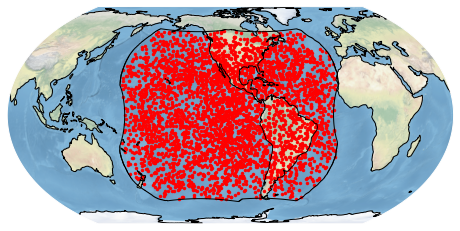

In [18]:
import matplotlib.pyplot as plt
bdf = BolideDataFrame(source='website')
bdf.plot_detections(boundary='goes')
plt.show()

If you are familiar with matplotlib syntax, all of the same sorts of things work. Here is an example taking advantage of matplotlib:

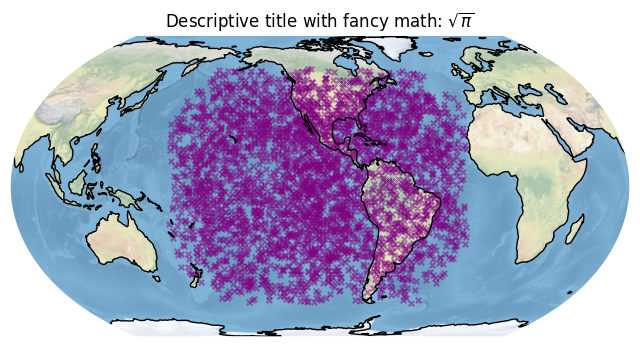

In [19]:
fig, ax = bdf.plot_detections(marker='x', alpha=0.5, color='purple', s=15, figsize=(15,9))
plt.title('Descriptive title with fancy math: $\sqrt{\pi}$')  # add a title
plt.savefig('descriptive-filename.png', dpi=300, bbox_inches='tight')  # save to disk
plt.show()

[Here](https://matplotlib.org/stable/tutorials/index.html) are some good tutorials on matplotlib.

If we only want to plot detections by GLM-17 and thus only really need the GOES-West position field-of-view boundary, we can do that as follows below. Note how we can filter and plot in the same line.

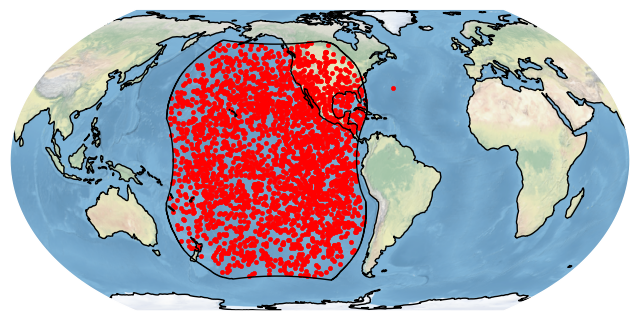

In [20]:
bdf[bdf.detectedBy.str.contains('GLM-17')].plot_detections(boundary='goes-w')
plt.show()

This shows us an interesting point in the Atlantic outside of the GOES-West GLM field-of-view. This is from when GOES-17 was not yet in the GOES-West position. If we only want points within the GOES-West GLM field-of-view, we can filter by field of view instead:

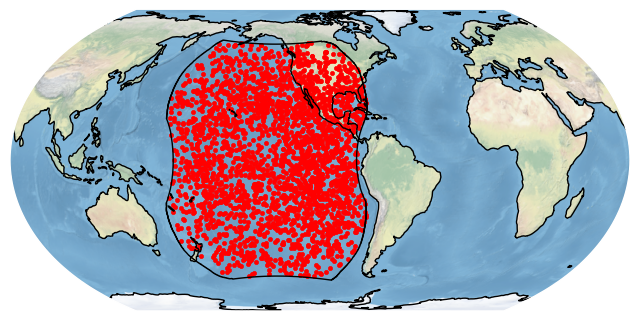

In [21]:
bdf.filter_boundary(boundary=['goes-w']).plot_detections(boundary='goes-w')
plt.show()

What if we don't like this map projection? `plot_detections` can accept any map projection in the form of a Cartopy CoordinateReferenceSystem object in the `crs` argument. Here is a map roughly from the perspective of GOES-16:

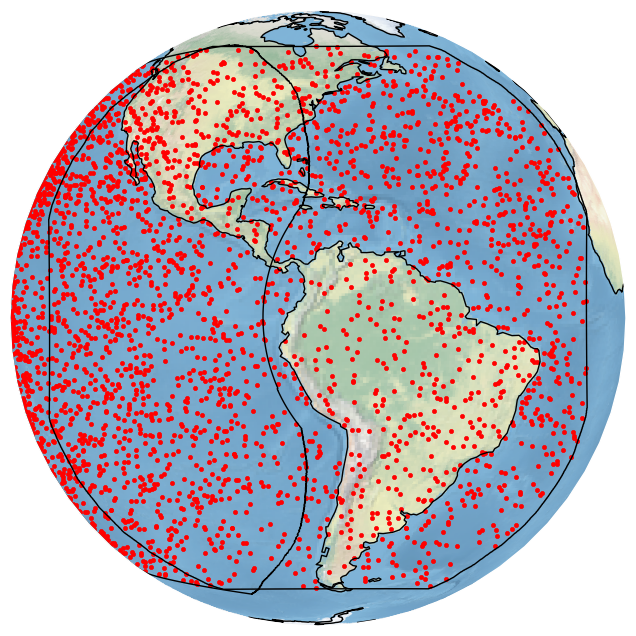

In [22]:
import cartopy.crs as ccrs
crs = ccrs.Geostationary(central_longitude = -75.2)
bdf.plot_detections(crs=crs, boundary=['goes-e','goes-w'])
plt.show()

We can get the same plot by using the built-in GOES_E CRS:

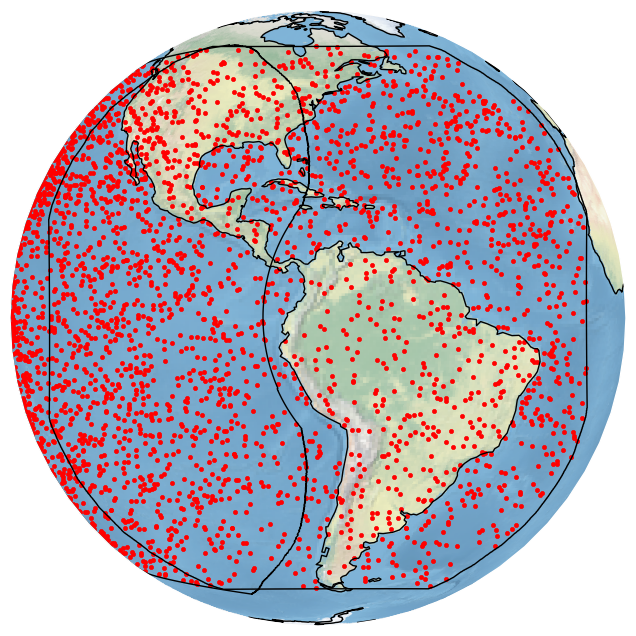

In [23]:
import bolides.crs as bcrs
bdf.plot_detections(crs=bcrs.GOES_E(), boundary=['goes-e','goes-w'])
plt.show()

[Here](https://scitools.org.uk/cartopy/docs/latest/reference/crs.html) is the documentation on CoordinateReferenceSystem objects, and [here](https://scitools.org.uk/cartopy/docs/latest/reference/projections.html) is a handy list of built-in projections. If you are really into map projections you can get some projections defined by an EPSG code using `ccrs.epsg`. Here is an example on the US National Atlas Equal Area projection (EPSG:2163):

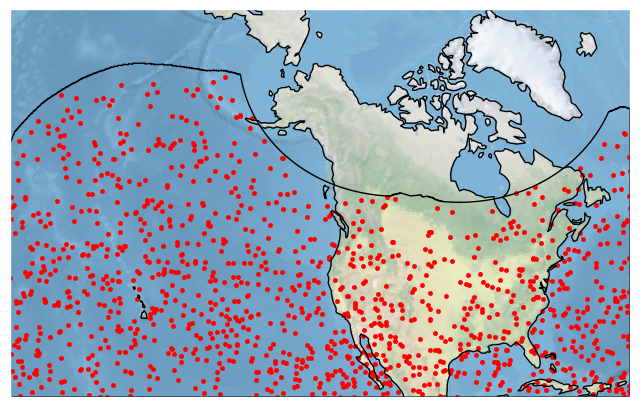

In [24]:
crs = ccrs.epsg(2163)
bdf.plot_detections(crs=crs, boundary='goes')
plt.show()

In the examples above, it would be nice to see which bolides were detected by which satellite. `plot_detections` handles automatic coloring of categorical data when a column name is passed in:

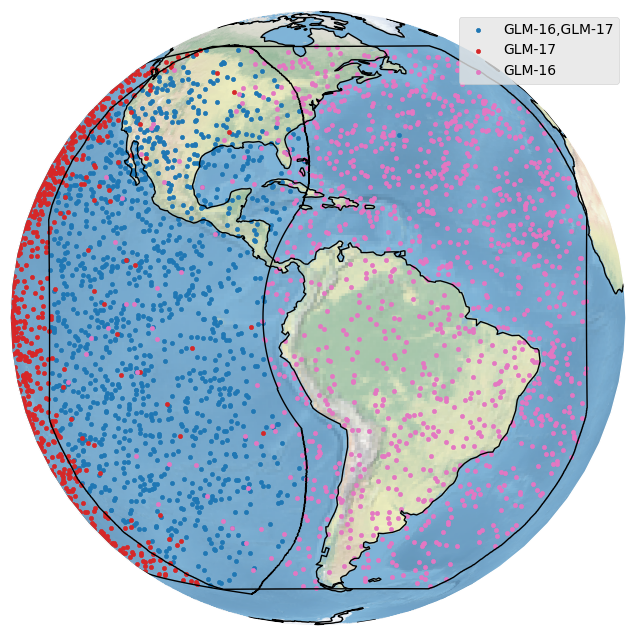

In [25]:
bdf.plot_detections(crs=bcrs.GOES_E(), category='detectedBy', boundary=['goes-e','goes-w'])
plt.show()

Neat. We can also plot quantitative data:

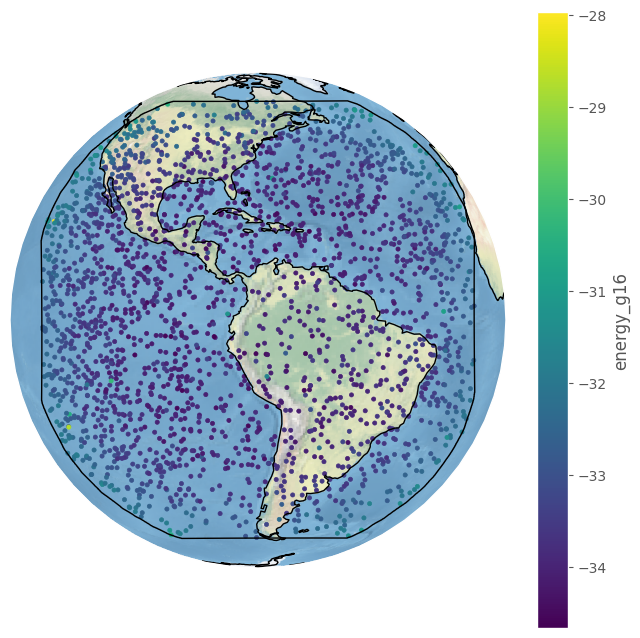

In [26]:
import numpy as np
fig, ax = bdf.plot_detections(crs=bcrs.GOES_E(), c=np.log(bdf.energy_g16), boundary='goes-e', figsize=(8,6))
plt.show()

The `BolideDataFrame` class is technically a subclass of the `GeoDataFrame` class from GeoPandas, so if you are familiar with it you can use their plotting methods too (see [here](https://geopandas.org/en/stable/docs/user_guide/mapping.html)).

We might also be interested in the density of bolides. The handy plot_density method will compute and plot this:

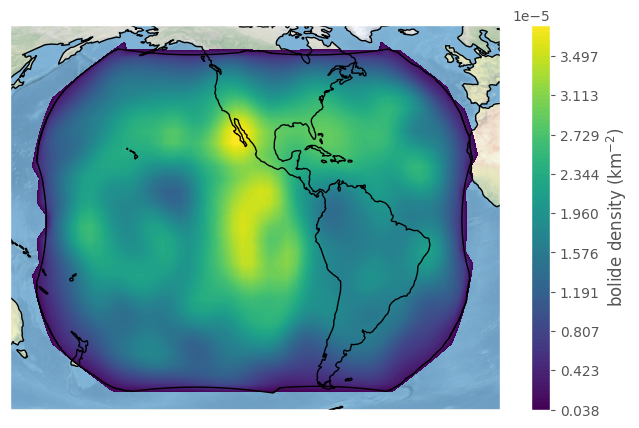

In [27]:
fig, ax = bdf.plot_density(boundary='goes', figsize=(8,5))
plt.show()

We can change the bandwidth argument to get a finer (and noisier!) density estimate:

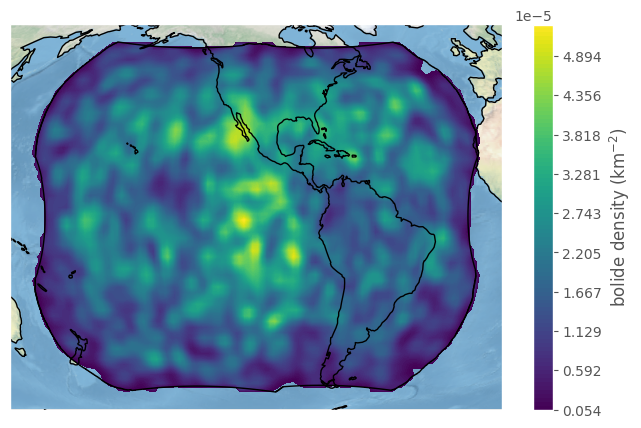

In [28]:
fig, ax = bdf.plot_density(bandwidth=2, lat_resolution=200, lon_resolution=100, boundary='goes', figsize=(8,5))
plt.show()

# Date Histograms

One useful visualization is the number of bolides detected at different dates. The `plot_dates` method handles this.

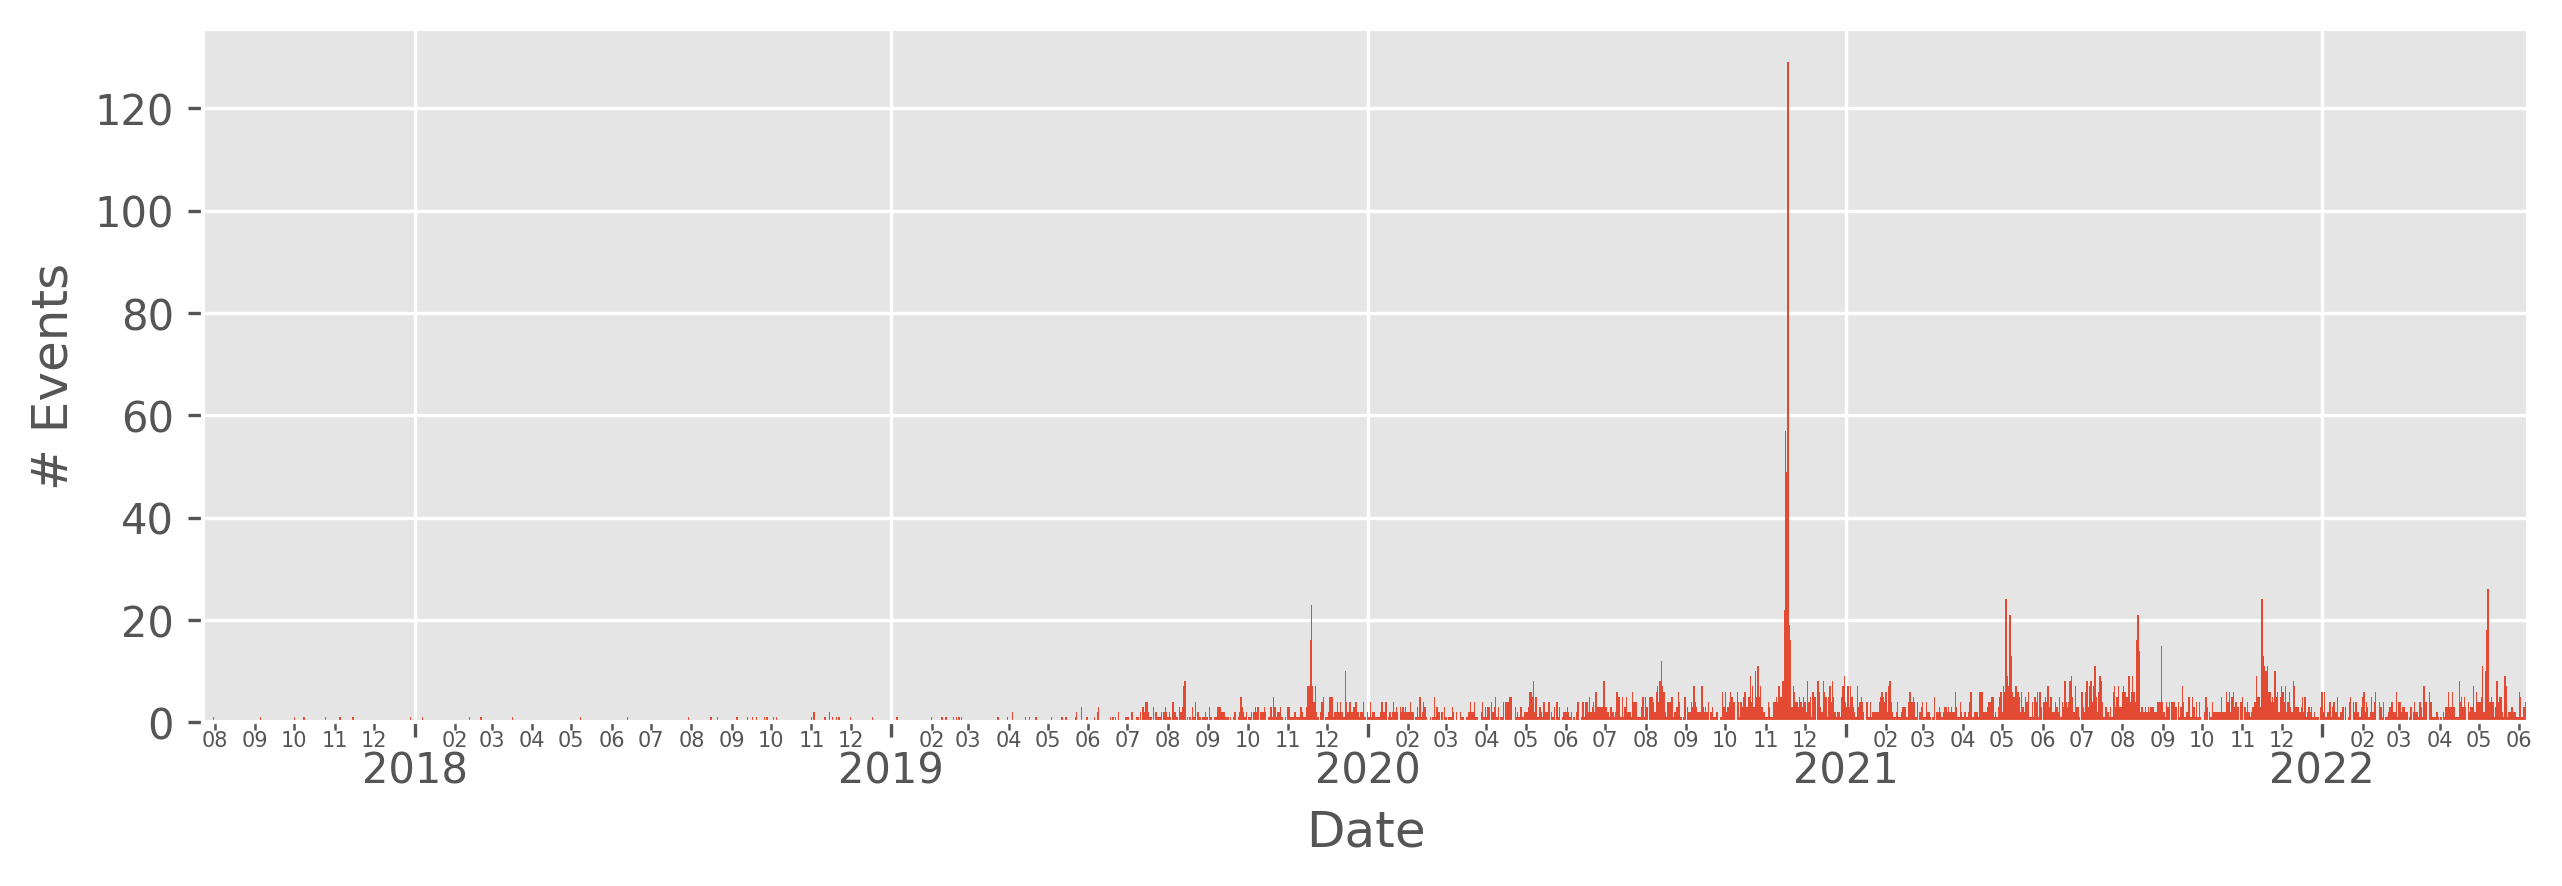

In [29]:
bdf.plot_dates()
plt.show()

Similar to `plot_detections`, regular matplotlib syntax works. If we are unhappy with the default style used by `bolides`, (ggplot), we can also pass in any [matplotlib style](https://matplotlib.org/stable/gallery/style_sheets/style_sheets_reference.html) into the style argument (This also works for `plot_detections`).

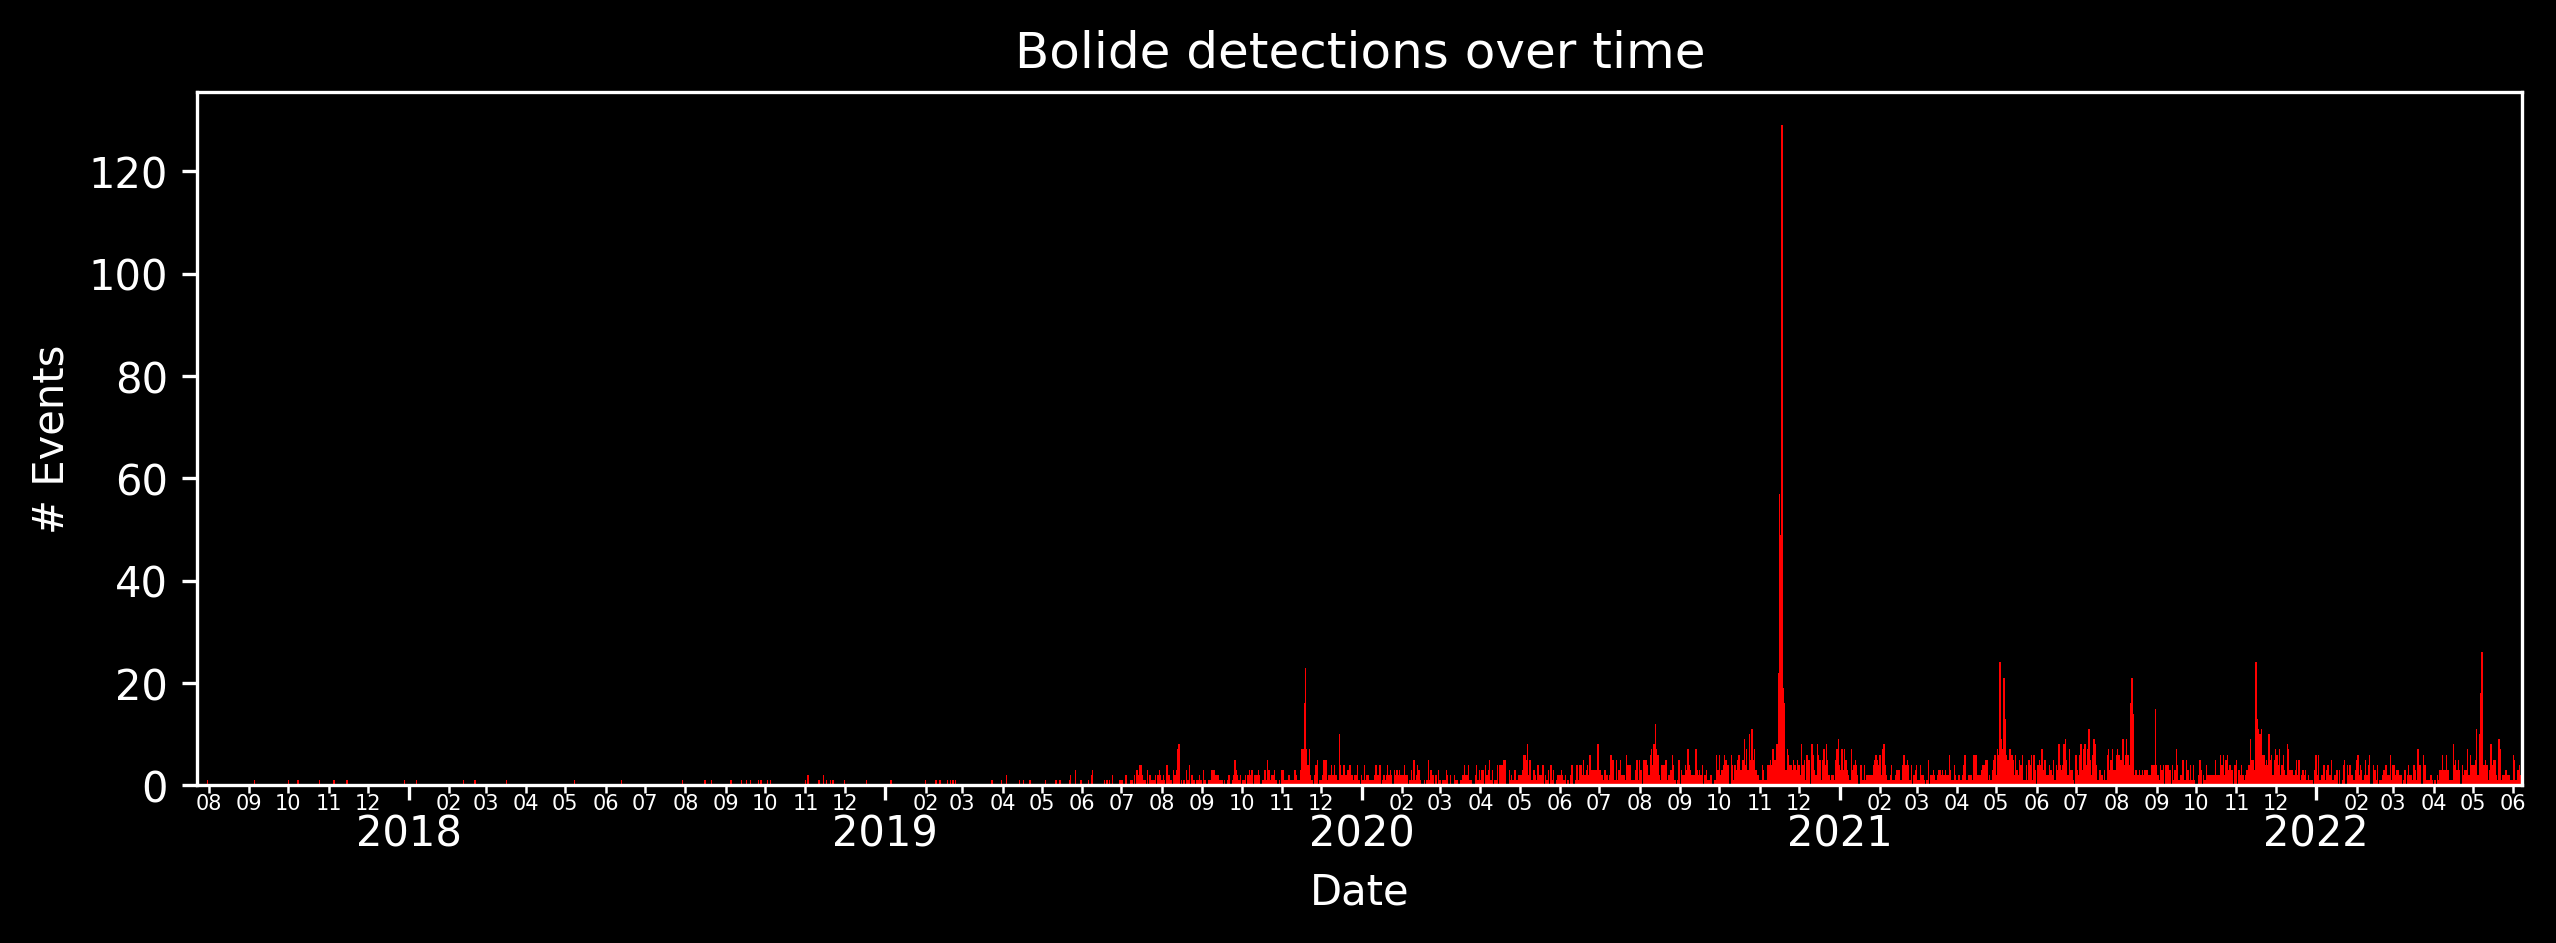

In [30]:
bdf.plot_dates(color='red', style='dark_background')
plt.title('Bolide detections over time')
plt.show()

 `plot_dates` also has a built-in date filter that works similarly to `filter_date`, and the frequency of the binning can be specified in the `freq` argument. The argument can take strings like "4D", "1Y", "3M", and so on. Similar to `plot_detections`, we can also filter and plot in the same line.

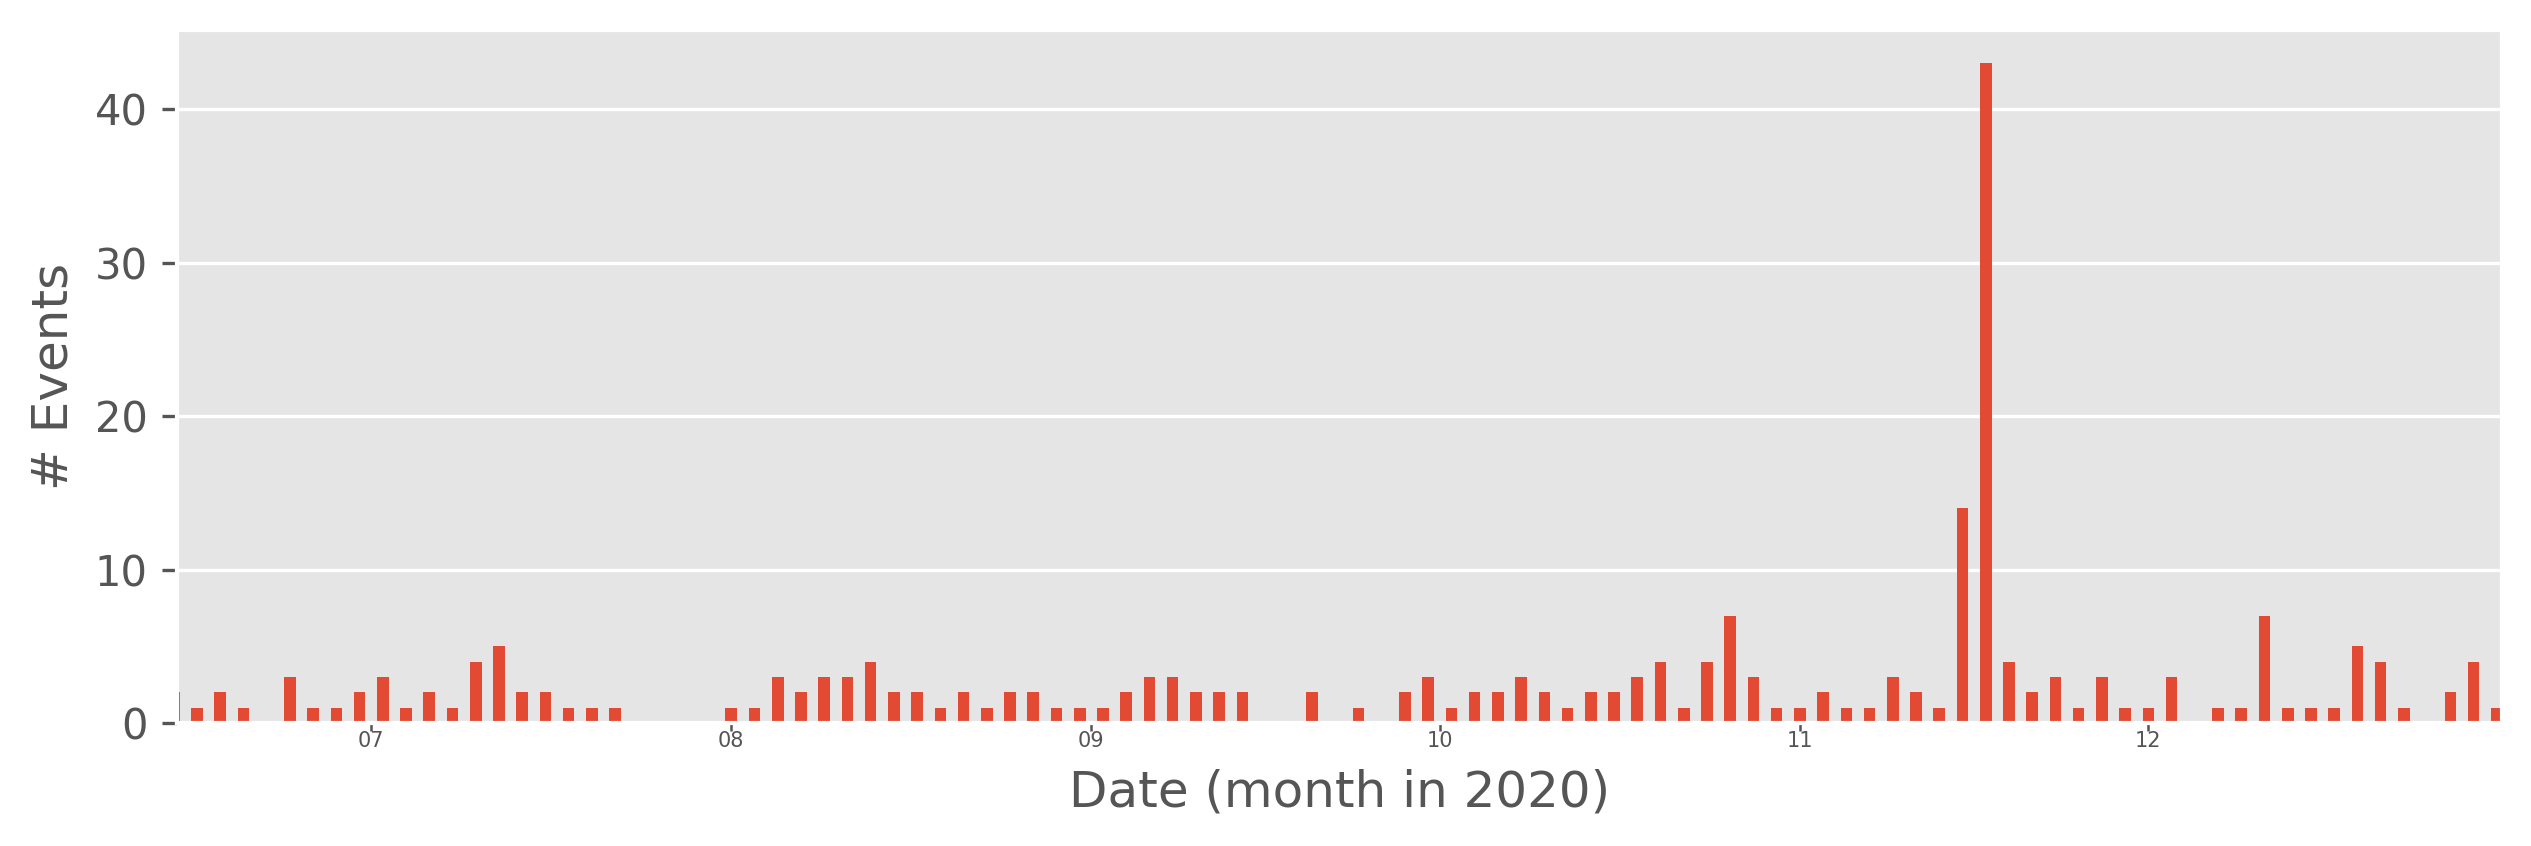

In [31]:
bdf[bdf.solarhour<4].plot_dates(freq="2D", start="2020-06-13", end="2021-01-01")
plt.show()

# Light curves

We also have data on bolide light curves, which can be interesting to look at. Let's first filter a small set of bolides to download light curves for:

In [32]:
bdf = BolideDataFrame()
bdf = bdf.filter_date(start='2022-06-01',end='2022-06-13')

Now we need to pull some data from the website:

In [33]:
bdf.add_website_data()

Exciting. Now we can plot light curves by accessing the `lightcurves` column:

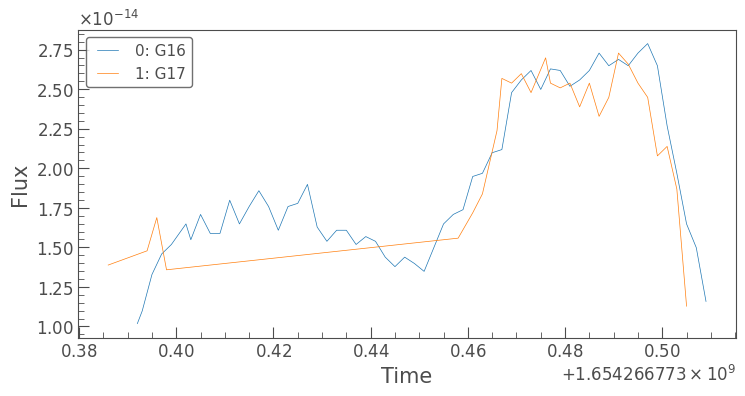

In [34]:
bdf.lightcurves[12].plot()
plt.show()

All of this is handled by the [lightkurve](http://docs.lightkurve.org/) package. The plots work similarly to `plot_detections` and `plot_dates` in that we can pass in regular matplotlib arguments.

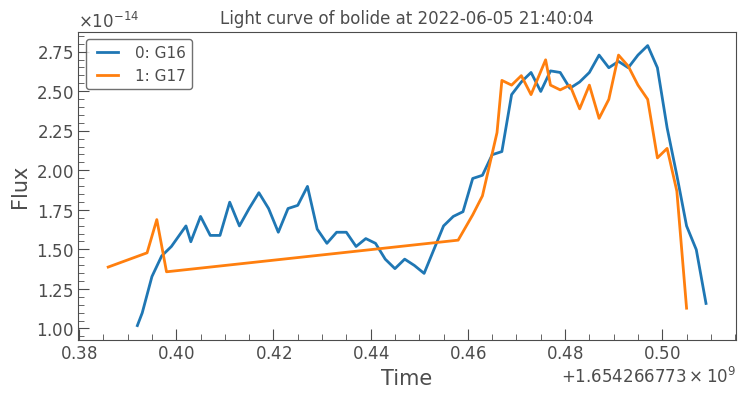

In [35]:
bdf.lightcurves[12].plot(linewidth=2)
plt.title('Light curve of bolide at '+str(bdf.datetime[6]))
plt.savefig(bdf._id[12] + '.png', dpi=300, bbox_inches='tight')
plt.show()

# Augmenting the data

`bolides` also supports automatically combining bolide data from multiple sources via the `augment` method. For instance, we may want to add USG data to GLM data to get additional information.

In [36]:
glm = BolideDataFrame(source = 'website')
usg = BolideDataFrame(source = 'usg')

print("columns before augmentation:", len(glm.columns))
print("length before augmentation:", len(glm), 'bolides')

combined = glm.augment(usg)

print("columns after augmentation:", len(combined.columns))
print("length after augmentation:", len(combined), 'bolides')

columns before augmentation: 50
length before augmentation: 3754 bolides


Augmenting data: 100%|███████████████████████████████████████████████| 3754/3754 [00:15<00:00, 243.08it/s]

columns after augmentation: 64
length after augmentation: 3754 bolides


Note how the combined BolideDataFrame has more columns. These are coming from USG data. Columns ending in `_y` are the USG versions of those that existed in both data sets. Note how the length of the BolideDataFrame stays the same. This is because, by default `augment` keeps detections that only exist in the GLM data. If we instead want to only keep bolides that exist in both BolideDataFrames, we can use the `intersection` argument:

In [37]:
print(len(glm.augment(usg, intersection=True)), 'bolides')

Augmenting data: 100%|███████████████████████████████████████████████| 3754/3754 [00:14<00:00, 258.21it/s]

73 bolides
